<center>
<img src="FIFA-19-Background-1-768x401.jpg" />
    
## Aprendizaje No Supervisado 2020 DiploDatos
    Laura Alonso Alemany, Ana Georgina Flesia y Valeria Rulloni
## Agrupamiento con el FIFA 2019 dataset
    
Material basado en notas de Ana Georgina Flesia bajo los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/), a su vez basado de material de [SilveMel](https://www.kaggle.com/karangadiya/fifa19/downloads/data.csv/comments) y otros.

### Indice de temas
1. [Inicialización del entorno](#1.-Inicialización-del-entorno)
2. [Preparación de los datos](#2.-Preparación-de-los-datos)
3. [Clustering KM](#3.-Clustering-con-Kmeans)
4. [Clustering MS](#4.-Clustering-con-Mean-Shift)
5. [Clustering KM2](#5.-Clustering-con-Kmeans-sin-arqueros)
6. [Clustering MS2](#6.-Clustering-con-Mean-Shift-sin-arqueros)

##Objetivo:
    Agrupar jugadores usando características generales en cuatro grupos que representen posiciones preferidas del
    juego:
    
    Defensa
    Medio campo
    Ataque
    Arqueros
    

## 1.-Inicialización-del-entorno

Empezamos cargando algunas herramientas para cargar los datos y manipularlos.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

Para visualización usamos plotly, pero podemos usar seaborn tambien, o matplotlib. 

In [2]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

## 2.-Preparación-de-los-datos

Cargamos los datos bajados de la database de [Kaggle](https://www.kaggle.com/karangadiya/fifa19) como 'data.csv'. 

In [4]:
df=pd.read_csv("players_20.csv")

**Preparamos la base para Clustering:**

**Retiramos jugadores con bajo Desempeño global ("Overall")**

**y consideramos Variables de desempeño por habilidad (skills_ratings)**

In [266]:
n=10000

df_n=df.loc[:n] #los primeros n
df_n=df_n[(df_n['overall']>70)] # mejores jugadores

skills_ratings = ['attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning','goalkeeping_reflexes']

print(len(skills_ratings))

df_skills=df_n[skills_ratings]


34


# 3.-Clustering-con-Kmeans

ES necesario definirle la cantidad de grupos/clusters (n_clusters), es un hiperparámetro del algoritmo. 


In [6]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust = 5

km = KMeans(n_clusters=n_clust)
km.fit(df_skills)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  11121643.747699028


**Elección de la cantidad de grupos/clusters**

Una forma de seleccionar la cantidad más adecuada de clusters es probar varias cantidades y usar el criterio del codo: "elbow method", utilizando una medida de ajuste que puede ser Inertia.

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

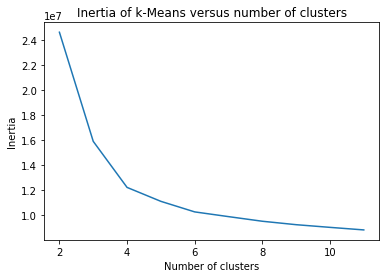

In [7]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i+2).fit(df_skills).inertia_ for i in range(10)]

from matplotlib import pyplot as plt
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")
#intertia: within-cluster sum-of-squares 

In [8]:
#Se puede ver que la inertia comienza a esetabilizarse entre el valor 4 y 6 del numero de clusters.

**Graficamos el resultado kmedias con la cantidad de clases elegida: Visualizamos de a dos variables por vez**

In [9]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1='movement_balance'
skill_2='mentality_interceptions'

#skill_1='defending_sliding_tackle'
#skill_2='attacking_short_passing'


kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [10]:
df_clusters=df_n.copy()
df_clusters['kmeans'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')

Kmeans encontró:  5 clusters, nosotros forzamos la cantidad


**EVALUACIÓN**

**EJERCICIO: Análisis exploratorio de los clusters, usando las clases asignadas por kmeans** 
- Cantidad de observaciones por Cluster
- Análisis descriptivo separando por Cluster
- Tabla de contingencia alguna categórica vs clusters
- Silohuette?


# Exploración

In [13]:
#Cantidad de clusters encontrados:
len(set(df_clusters['kmeans']))

5

In [11]:
df_clusters.groupby(by=['kmeans']).size()

kmeans
0     645
1    1656
2     440
3     938
4    1077
dtype: int64

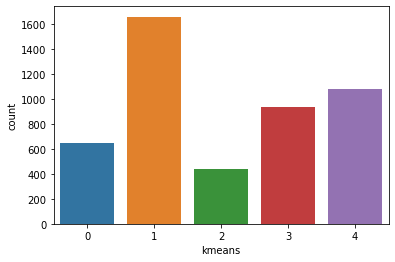

In [12]:
sns.countplot(data=df_clusters, x=df_clusters.kmeans)

In [15]:
df_clusters.groupby(by=['kmeans'])['team_position'].describe().T

kmeans    0     1    2    3     4
count   628  1627  428  918  1058
unique   14    26    3   16    23
top     SUB   SUB   GK  SUB   SUB
freq    241   521  279  282   365

In [18]:
interesting_skills=[skill_1,skill_2]

In [19]:
df_clusters.groupby(by=['kmeans'])[interesting_skills].describe().T

kmeans                                  0            1           2  \
movement_balance        count  645.000000  1656.000000  440.000000   
                        mean    62.427907    70.542874   44.947727   
                        std     11.666290     9.786450   10.336458   
                        min     29.000000    31.000000   20.000000   
                        25%     56.000000    65.000000   38.000000   
                        50%     65.000000    71.000000   45.000000   
                        75%     71.000000    77.000000   52.250000   
                        max     92.000000    94.000000   69.000000   
mentality_interceptions count  645.000000  1656.000000  440.000000   
                        mean    30.080620    71.371981   19.715909   
                        std      9.947830     6.571147    4.950665   
                        min     10.000000    41.000000    7.000000   
                        25%     22.000000    68.000000   16.000000   
                        50%     29.000000    72.000000   20.000000   
                        75%     37.000000    76.000000   23.000000   
                        max     61.000000    92.000000   30.000000   

kmeans                                  3            4  
movement_balance        count  938.000000  1077.000000  
                        mean    54.684435    77.752089  
                        std     11.815849     8.308123  
                        min     26.000000    41.000000  
                        25%     47.000000    72.000000  
                        50%     56.000000    77.000000  
                        75%     63.000000    84.000000  
                        max     91.000000    96.000000  
mentality_interceptions count  938.000000  1077.000000  
                        mean    73.614072    39.062210  
                        std      4.723552    11.782289  
                        min     61.000000    12.000000  
                        25%     70.000000    30.000000  
                        50%     73.000000    39.000000  
                        75%     77.000000    48.000000  
                        max     88.000000    69.000000

In [21]:
#Veamos si los grupos tienen alguna relación con la posicion de los jugadores:
plt.figure(figsize=(10,6))
contingencia0 = pd.crosstab(df_clusters.kmeans, df_clusters.team_position)
contingencia0

team_position  CAM  CB  CDM  CF  CM   GK  LAM   LB  LCB  LCM  LDM  LF   LM  \
kmeans                                                                       
0                7   0    0   3   0    0    2    0    0    1    0   1   12   
1               44   6   68   0  25    0    1  147   34  107   83   3   27   
2                0   0    0   0   0  279    0    0    0    0    0   0    0   
3                0  34   13   0   2    0    0   17  222    5   13   0    2   
4               97   0    1   6   3    0   10    0    0   41    3   7  124   

team_position  LS  LW  LWB  RAM   RB  RCB  RCM  RDM  RES  RF   RM  RS  RW  \
kmeans                                                                      
0              55   8    0    0    0    0    0    0   33   0   11  58   7   
1               1   3   11    2  153   29  129   80   86   2   40   0   8   
2               0   0    0    0    0    0    0    0   18   0    0   0   0   
3               0   0    1    0   23  233    8   15   45   0    0   0   0   
4              28  60    2   11    0    0   21    1   64   5  101  30  54   

team_position  RWB   ST  SUB  
kmeans                        
0                0  189  241  
1               13    4  521  
2                0    0  131  
3                3    0  282  
4                1   23  365

<Figure size 720x432 with 0 Axes>

<Figure size 864x576 with 0 Axes>

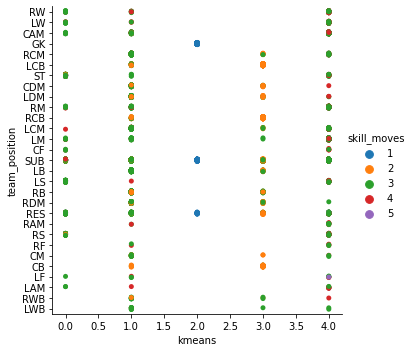

In [22]:
#Visualmente..
#Tendrá algo que ver la posicion del jugador con los skill moves??

plt.figure(figsize=(12,8))
sns.catplot(data=df_clusters, x="kmeans", y="team_position", hue="skill_moves")

En todos los clusters hay jugadores en varias posiciones y la cantidad va descendiendo según el número de cluster, y en el 1 se ve sólo 1 habilidad que parece pertenecer a 3 posiciones solamente. En el cluster cero pareciera haber más jugadores con habilidades 3 y 4, mientras que en el dos, habilidades con 2 y 3.

In [24]:
#vamos a comprobrarlo..
plt.figure(figsize=(10,6))
contingencia2 = pd.crosstab(df_clusters.kmeans, df_clusters.skill_moves)
contingencia2

skill_moves    1    2     3    4   5
kmeans                              
0              0   56   516   71   2
1              0  217  1218  217   4
2            440    0     0    0   0
3              0  835   103    0   0
4              0    1   509  528  39

<Figure size 720x432 with 0 Axes>

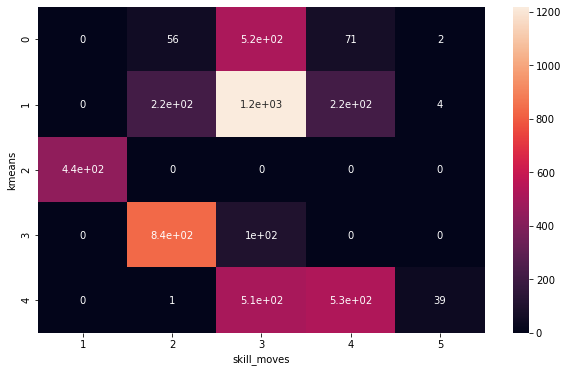

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(contingencia2, annot=True)

Hay más personas con habilidad de movimiento 3 en el cluster 0! y en el cluster 3 tenemos las habilidades más altas.

In [29]:
#tabla de contingencia de las habilidades de movimiento de los jugadores con la posicion del jugador en el cluster 3
plt.figure(figsize=(10,6))
contingencia3 = pd.crosstab(df_clusters[df_clusters.kmeans==1].skill_moves, df_clusters[df_clusters.kmeans==1].team_position)
contingencia3

team_position  CAM  CB  CDM  CM  LAM   LB  LCB  LCM  LDM  LF  LM  LS  LW  LWB  \
skill_moves                                                                     
2                2   5   13   5    0    7   20    5   11   0   0   0   0    0   
3               29   1   49  18    0  127   13   86   63   2  20   0   1    9   
4               13   0    5   2    1   12    1   16    8   1   7   1   2    2   
5                0   0    1   0    0    1    0    0    1   0   0   0   0    0   

team_position  RAM   RB  RCB  RCM  RDM  RES  RF  RM  RW  RWB  ST  SUB  
skill_moves                                                            
2                0   17   18   11   20    3   0   1   0    1   0   72  
3                1  122   11   96   54   76   1  31   5   12   4  370  
4                1   14    0   22    6    7   1   8   3    0   0   78  
5                0    0    0    0    0    0   0   0   0    0   0    1

<Figure size 720x432 with 0 Axes>

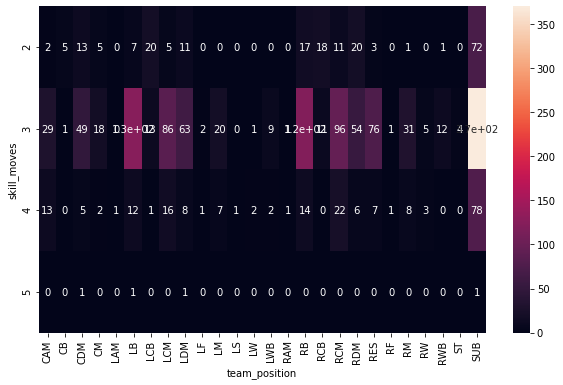

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(contingencia3, annot=True)

En el cluster 3 hay más jugadores con skills moves 2 que juegan como SUB, RB Y LCB

In [37]:
#Vemos algunas otras características..

In [33]:
plt.figure(figsize=(10,6))
contingencia6 = pd.crosstab(df_clusters.kmeans, df_clusters.work_rate)
contingencia6

work_rate  High/High  High/Low  High/Medium  Low/High  Low/Medium  \
kmeans                                                              
0                 71        87          192         0           1   
1                283        28          454        28          19   
2                  0         0            0         0           0   
3                 27         2           66        95          78   
4                 84       123          407         0           0   

work_rate  Medium/High  Medium/Low  Medium/Medium  
kmeans                                             
0                   16         104            174  
1                  272           9            563  
2                    0           0            440  
3                  294           1            375  
4                   13         129            321

<Figure size 720x432 with 0 Axes>

No parece haber una correlación de los clusters con la posición de los jugadores al menos no de la forma más directa.

Podemos empezar a sospechar de si el número de clusters elegido es el correcto, o si estamos observando con las variables apropiadas.

Empezaremos por preguntarnos cuál es el par donde se puede ver una mayor separación de los centroides de los grupos encontrados por kmeans 

# Mejores variables

In [38]:
cent=km.cluster_centers_

In [39]:
centroide_kmean=pd.DataFrame(data=cent, columns=skills_ratings)
centroide_kmean

attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0           55.192547            75.406832                   73.394410   
1           68.969203            57.140700                   62.432971   
2           14.945455            13.175000                   14.909091   
3           47.260128            34.840085                   72.468017   
4           70.866419            69.932282                   53.348794   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                67.114907          69.180124        71.021739    59.967391   
1                74.980072          55.942633        71.919082    66.178140   
2                30.352273          13.706818        15.400000    15.740909   
3                66.371002          34.805970        53.643923    41.466951   
4                73.231911          65.449907        77.871058    72.040816   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0          51.538820           52.498447           72.768634   
1          59.019324           71.166667           74.440217   
2          15.034091           29.470455           22.768182   
3          36.963753           62.022388           62.666311   
4          65.846939           66.332096           76.943414   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0              69.838509              71.472050         68.251553   
1              70.105676              69.614734         71.431763   
2              44.488636              44.452273         46.302273   
3              57.920043              60.626866         55.597015   
4              79.589981              77.824675         80.927644   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0           71.849379         62.440994         75.807453      73.215839   
1           73.110507         70.542874         71.451691      69.244565   
2           71.136364         44.947727         52.845455      64.925000   
3           69.804904         54.684435         56.747335      72.996802   
4           71.847866         77.730056         73.235622      62.646568   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0      69.468944       77.045031         67.293478             63.220497   
1      77.810990       69.590580         65.251208             73.025966   
2      33.927273       65.977273         13.956818             29.429545   
3      68.619403       79.287846         40.318763             75.892324   
4      70.463822       59.370130         70.201299             54.450835   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                30.074534              75.857143         62.947205   
1                71.371981              66.007850         69.071256   
2                19.715909              12.756818         46.470455   
3                73.614072              40.669510         48.743070   
4                39.057514              72.410019         72.381262   

   mentality_penalties  mentality_composure  defending_marking  \
0            69.579193            70.782609          33.007764   
1            58.384662            72.187198          69.435386   
2            22.175000            53.890909          16.902273   
3            44.298507            67.563966          73.468017   
4            65.492579            71.747681          40.014842   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                  28.759317                 24.208075           10.656832   
1                  72.019928                 69.341184           10.600242   
2                  14.579545                 14.352273           75.765909   
3                  75.271855                 72.973348           10.637527   
4                  38.488868                 34.686456           10.582560   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0  

In [40]:
centroide_kmean.describe()

attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
count            5.000000             5.000000                    5.000000   
mean            51.446750            50.098980                   55.310657   
std             22.627767            25.882655                   24.022177   
min             14.945455            13.175000                   14.909091   
25%             47.260128            34.840085                   53.348794   
50%             55.192547            57.140700                   62.432971   
75%             68.969203            69.932282                   72.468017   
max             70.866419            75.406832                   73.394410   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
count                 5.000000           5.000000         5.000000   
mean                 62.410033          47.817091        57.971160   
std                  18.307403          23.270796        25.455337   
min                  30.352273          13.706818        15.400000   
25%                  66.371002          34.805970        53.643923   
50%                  67.114907          55.942633        71.021739   
75%                  73.231911          65.449907        71.919082   
max                  74.980072          69.180124        77.871058   

       skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  \
count     5.000000           5.000000            5.000000            5.000000   
mean     51.078842          45.680585           56.298011           61.917352   
std      22.844898          20.212085           16.497596           22.547580   
min      15.740909          15.034091           29.470455           22.768182   
25%      41.466951          36.963753           52.498447           62.666311   
50%      59.967391          51.538820           62.022388           72.768634   
75%      66.178140          59.019324           66.332096           74.440217   
max      72.040816          65.846939           71.166667           76.943414   

       movement_acceleration  movement_sprint_speed  movement_agility  \
count               5.000000               5.000000          5.000000   
mean               64.388569              64.798120         64.502050   
std                13.521458              12.930440         13.623613   
min                44.488636              44.452273         46.302273   
25%                57.920043              60.626866         55.597015   
50%                69.838509              69.614734         68.251553   
75%                70.105676              71.472050         71.431763   
max                79.589981              77.824675         80.927644   

       movement_reactions  movement_balance  power_shot_power  power_jumping  \
count            5.000000          5.000000          5.000000       5.000000   
mean            71.549804         62.069217         66.017511      68.605755   
std              1.207269         12.892666         10.451240       4.743472   
min             69.804904         44.947727         52.845455      62.646568   
25%             71.136364         54.684435         56.747335      64.925000   
50%             71.847866         62.440994         71.451691      69.244565   
75%             71.849379         70.542874         73.235622      72.996802   
max             73.110507         77.730056         75.807453      73.215839   

       power_stamina  power_strength  power_long_shots  mentality_aggression  \
count       5.000000        5.000000          5.000000              5.000000   
mean       64.058086       70.254172         51.404313             59.203834   
std        17.234593        8.138145         24.097370             18.673443   
min        33.927273       59.370130         13.956818             29.429545   
25%        68.619403       65.977273         40.318763             54.450835   
50%        69.468944       69.590580         65.251208             63.220497   
75% 

Planteamos hacer un análisis de las correlaciones entre los centroides que indican cada variable en cada grupo, y en donde haya menos correlación es donde los centroides más se van a alejar. 

In [41]:
correlaciones=centroide_kmean.corr()

In [42]:
correlaciones

attacking_crossing  attacking_finishing  \
attacking_crossing                    1.000000             0.860130   
attacking_finishing                   0.860130             1.000000   
attacking_heading_accuracy            0.716248             0.683099   
attacking_short_passing               0.966556             0.815394   
attacking_volleys                     0.885153             0.998493   
skill_dribbling                       0.977329             0.933862   
skill_curve                           0.984210             0.929543   
skill_fk_accuracy                     0.985246             0.911201   
skill_long_passing                    0.935188             0.650339   
skill_ball_control                    0.969097             0.897433   
movement_acceleration                 0.955396             0.938053   
movement_sprint_speed                 0.959102             0.953224   
movement_agility                      0.937522             0.905627   
movement_reactions                    0.518473             0.531040   
movement_balance                      0.951107             0.842503   
power_shot_power                      0.836905             0.976878   
power_jumping                         0.066859             0.146377   
power_stamina                         0.940026             0.786735   
power_strength                       -0.107608            -0.033946   
power_long_shots                      0.953874             0.971734   
mentality_aggression                  0.699270             0.491112   
mentality_interceptions               0.493812             0.073833   
mentality_positioning                 0.917022             0.989553   
mentality_vision                      0.893174             0.866172   
mentality_penalties                   0.896189             0.992126   
mentality_composure                   0.969323             0.883235   
defending_marking                     0.543335             0.148448   
defending_standing_tackle             0.523338             0.112214   
defending_sliding_tackle              0.477208             0.052769   
goalkeeping_diving                   -0.902134            -0.797552   
goalkeeping_handling                 -0.902945            -0.798814   
goalkeeping_kicking                  -0.901974            -0.797869   
goalkeeping_positioning              -0.902676            -0.799782   
goalkeeping_reflexes                 -0.902591            -0.798422   

                            attacking_heading_accuracy  \
attacking_crossing                            0.716248   
attacking_finishing                           0.683099   
attacking_heading_accuracy                    1.000000   
attacking_short_passing                       0.862084   
attacking_volleys                             0.699657   
skill_dribbling                               0.793960   
skill_curve                                   0.678750   
skill_fk_accuracy                             0.643609   
skill_long_passing                            0.756730   
skill_ball_control                            0.854108   
movement_acceleration                         0.617626   
movement_sprint_speed                         0.708167   
movement_agility                              0.509863   
movement_reactions                            0.023398   
movement_balance                              0.485440   
power_shot_power                              0.572272   
power_jumping                                 0.710092   
power_stamina                                 0.892984   
power_strength                                0.597478   
power_long_shots                              0.722017   
mentality_aggression                          0.930535   
mentality_interceptions                       0.613183   
mentality_positioning                         0.735340   
mentality_vision                              0.395362   
mentality_penalties                           0.762545   
mentality_composure               

In [43]:
minimo_corr=[]
for i in correlaciones.columns:
    minimo_corr.append(correlaciones[i].abs().min())

In [44]:
minimo={'minimo':minimo_corr}
ma=pd.DataFrame(data=minimo)
ma

minimo
0   0.066859
1   0.033946
2   0.023398
3   0.132079
4   0.031533
5   0.006950
6   0.031307
7   0.026391
8   0.040166
9   0.103597
10  0.066138
11  0.052125
12  0.158526
13  0.023398
14  0.227311
15  0.001209
16  0.026391
17  0.228098
18  0.004550
19  0.058461
20  0.050446
21  0.021583
22  0.004550
23  0.104413
24  0.041949
25  0.127002
26  0.042679
27  0.037698
28  0.001209
29  0.191876
30  0.193820
31  0.190485
32  0.192702
33  0.192046

In [45]:
corr_min=ma['minimo'].sort_values(ascending=True)
corr_min[0:2]

28    0.001209
15    0.001209
Name: minimo, dtype: float64

Encontramos que la variable número 28 de la tabla de correlaciones es la que tiene la menor correlación con...

In [46]:
#Veamos cuáles eran estas variables
correlaciones.columns[28]

'defending_sliding_tackle'

In [47]:
correlaciones[correlaciones.columns[28]].abs().idxmin()

'power_shot_power'

In [50]:
#visualizamos..
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1='power_shot_power'
skill_2='defending_sliding_tackle'

#skill_1='defending_sliding_tackle'
#skill_2='attacking_short_passing'


kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

Sin embargo sigue habiendo un solapamiento, veamos cuáles son las distribuciones de éstas variables en los clusters

In [53]:
skills_ratings.index('defending_sliding_tackle')

28

In [54]:
skills_ratings.index('power_shot_power')

15

In [51]:
columnas_encontradas=[df_skills.columns[28],df_skills.columns[15]]

<Figure size 1008x864 with 0 Axes>

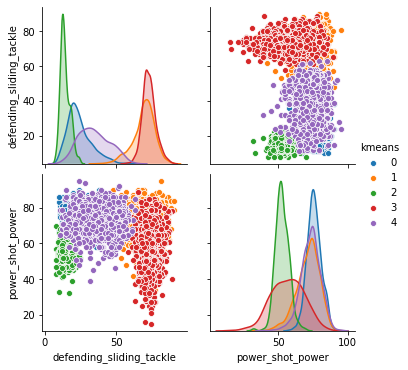

In [52]:
#Visualizamos 
plt.figure(figsize=(14,12))
sns.pairplot(data=df_clusters, vars=columnas_encontradas, hue='kmeans')

Podemos ver que por lo menos hay una distribución (cluster 3) que se solapa casi completamente con la distribución 1 en el grafico de distribución de 'defending_sliding_tackle', y lo mismo pasa con los clusters 0, 1 y 4 en la distribución de 'power_shot_power'.

Analizaremos el coeficiente de sillhoutte y corroboraremos si es necesario cambiar el número de cluster para evitar este solapamiento.

# Silhoutte

In [55]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.6252707111708773
For n_clusters = 3 The average silhouette_score is : 0.35731495331826296
For n_clusters = 4 The average silhouette_score is : 0.3285163575048322
For n_clusters = 5 The average silhouette_score is : 0.2855927333388514
For n_clusters = 6 The average silhouette_score is : 0.23410740465682306
For n_clusters = 7 The average silhouette_score is : 0.2232686608622496
For n_clusters = 8 The average silhouette_score is : 0.19785364167675684


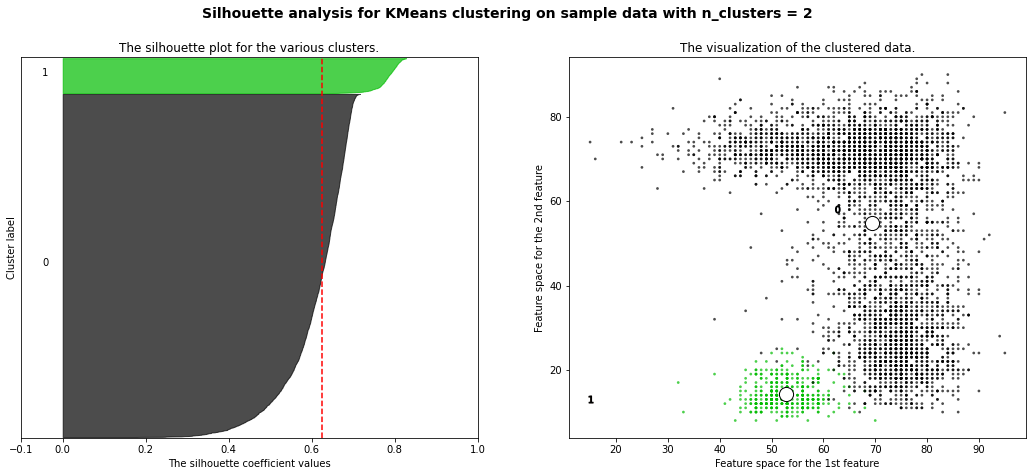

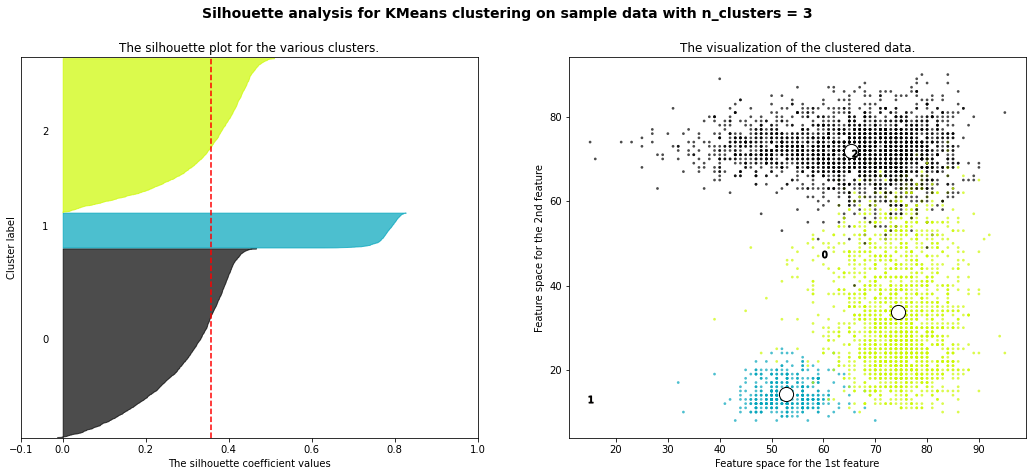

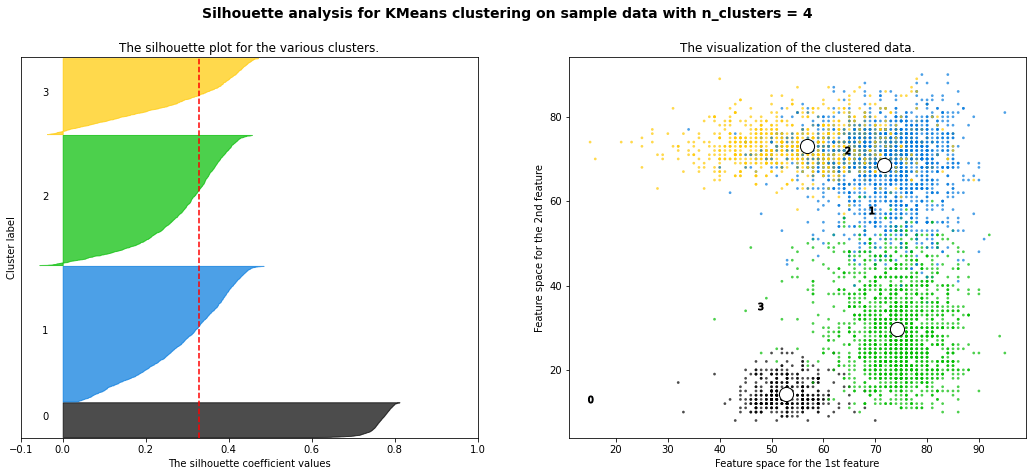

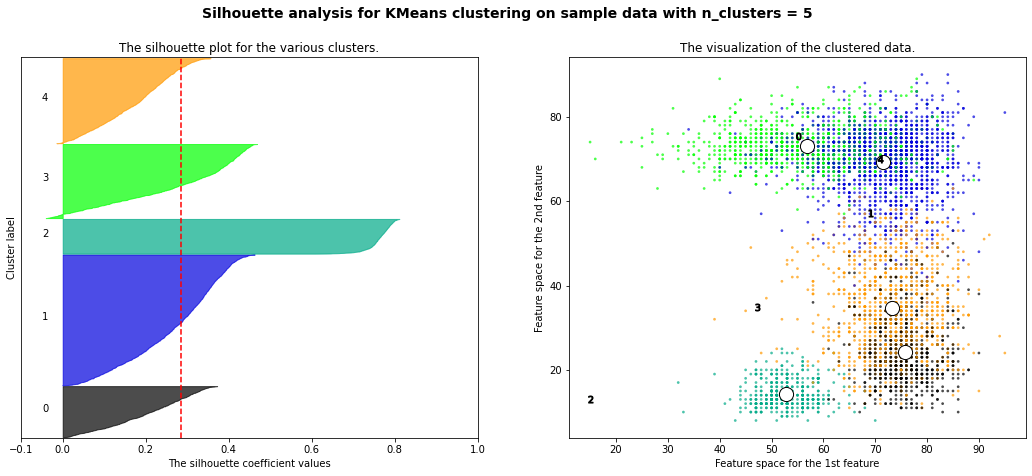

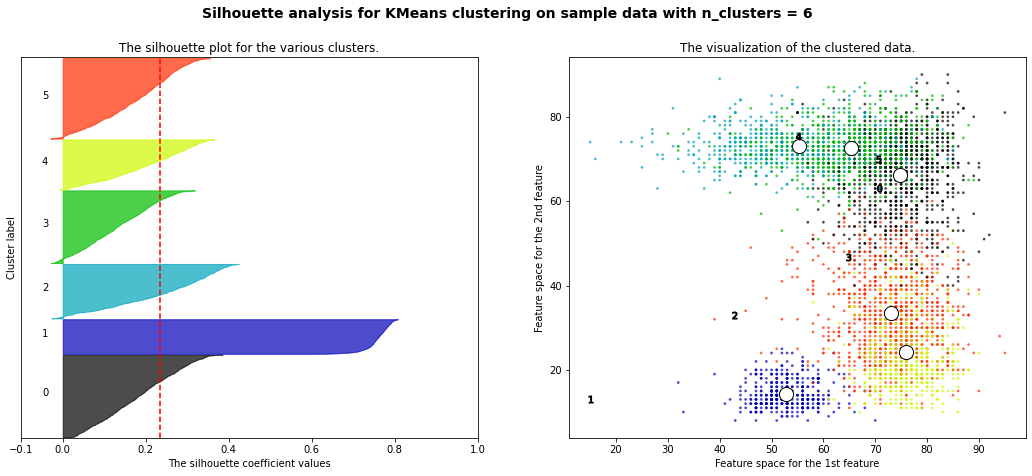

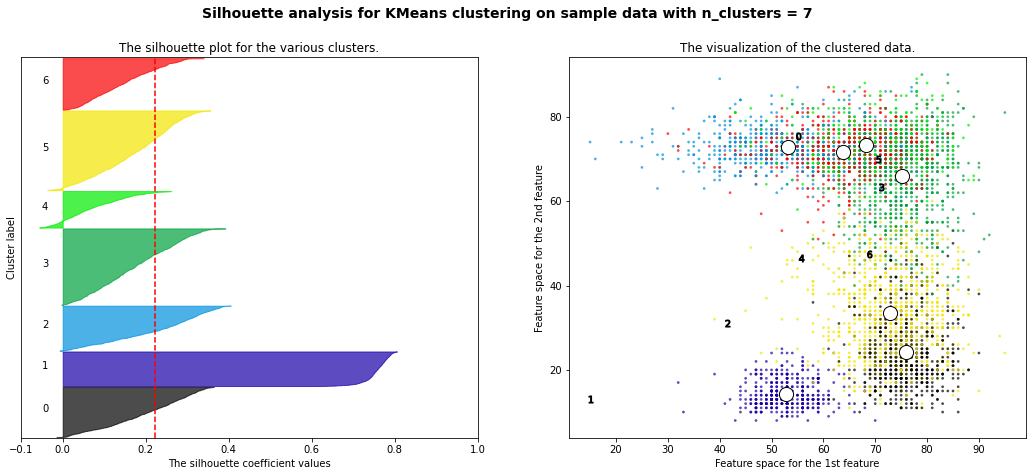

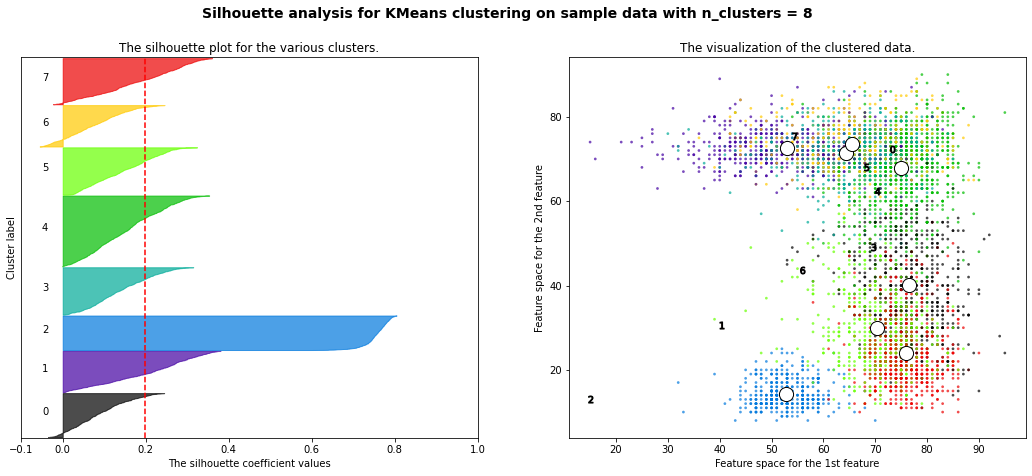

In [56]:
range_n_clusters=[2,3,4,5,6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_skills) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_skills)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_skills, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_skills, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_skills['power_shot_power'], df_skills['defending_sliding_tackle'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,15], centers[:,28], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

A medida que va aumentando el numero de clusters, el coefficiente de sillhouette baja, lo que quiere decir que 
aumenta el solapamiento a medida que aumentamos el número de clusters.

Podemos ver cómo mejora el coficiente al bajar de 5 a 4 el número de clusters, por lo que podríamos bajar el número a 4 o incluso a 3.

In [87]:
# Teníamos que:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número nuevo de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(df_skills)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  12232963.08741737


In [88]:
# Graficando más grande..
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1

skill_1=skills_ratings[15]
skill_2=skills_ratings[28]


kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [89]:
df_clusters=df_n.copy()
df_clusters['kmeans'] = km.labels_ #clusters

<Figure size 1008x864 with 0 Axes>

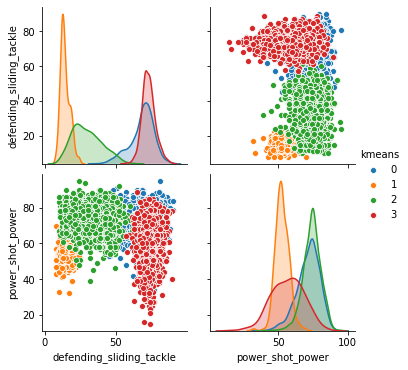

In [90]:
#Veamos los gráficos de distribución..
plt.figure(figsize=(14,12))
sns.pairplot(data=df_clusters, vars=columnas_encontradas, hue='kmeans')

Haciendo el mismo análisis que con 5 clusters..

In [91]:
df_clusters.groupby(by=['kmeans']).size()

kmeans
0    1715
1     440
2    1644
3     957
dtype: int64

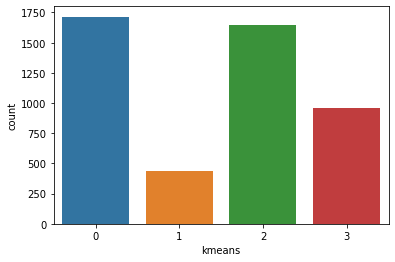

In [92]:
sns.countplot(data=df_clusters, x=df_clusters.kmeans)

In [93]:
df_clusters.groupby(by=['kmeans'])['team_position'].describe().T

kmeans     0    1     2    3
count   1685  428  1609  937
unique    27    3    23   16
top      SUB   GK   SUB  SUB
freq     542  279   575  292

<Figure size 864x576 with 0 Axes>

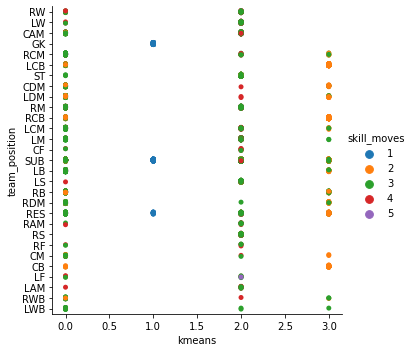

In [94]:
plt.figure(figsize=(12,8))
sns.catplot(data=df_clusters, x="kmeans", y="team_position", hue="skill_moves")

In [105]:
#vamos analizar si hay alguna relación entre la posición del jugador y los clusters formados..
plt.figure(figsize=(10,6))
contingenciag = pd.crosstab(df_clusters.kmeans, df_clusters.team_position)
contingenciag

team_position  CAM  CB  CDM  CF  CM   GK  LAM   LB  LCB  LCM  LDM  LF   LM  \
kmeans                                                                       
0               50   5   68   2  26    0    1  147   31  114   83   4   31   
1                0   0    0   0   0  279    0    0    0    0    0   0    0   
2               98   0    1   7   2    0   12    0    0   35    2   7  132   
3                0  35   13   0   2    0    0   17  225    5   14   0    2   

team_position  LS  LW  LWB  RAM   RB  RCB  RCM  RDM  RES  RF   RM  RS  RW  \
kmeans                                                                      
0               1   3   11    2  152   26  137   80   93   2   50   0   8   
1               0   0    0    0    0    0    0    0   18   0    0   0   0   
2              83  68    2   11    0    0   13    1   90   5  102  88  61   
3               0   0    1    0   24  236    8   15   45   0    0   0   0   

team_position  RWB   ST  SUB  
kmeans                        
0               13    3  542  
1                0    0  131  
2                1  213  575  
3                3    0  292

<Figure size 720x432 with 0 Axes>

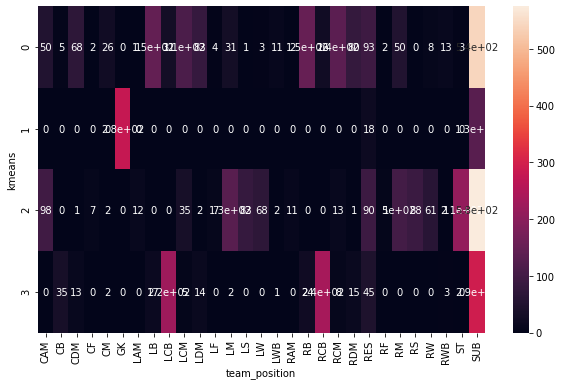

In [102]:

plt.figure(figsize=(10,6))
sns.heatmap(contingenciag, annot=True)

Hay mayor cantidad de jugadores SUB en el cluster 0 y le sigue RB Y LB, más GK en el cluster 1, en el cluster 2 hay  más SUB y le sigue ST, en el 3 hay mayor cantidad de jugadores SUB  y le sigue RCB.

En cluster 1 estarían todos los arqueros, pues tienen una sóla habilidad según el catplot que se graficó al prinicipio de la exploración. Se podría considerar a SUB como aquellos jugadores juveniles que pueden tomar cualquier posición, ya que parece estar con predominancia en todos los clusters.

In [104]:
#Si lo vemos matricialmente..
plt.figure(figsize=(10,6))
contingencia2 = pd.crosstab(df_clusters.kmeans, df_clusters.skill_moves)
contingencia2

skill_moves    1    2     3    4   5
kmeans                              
0              0  210  1248  250   7
1            440    0     0    0   0
2              0   56   984  566  38
3              0  843   114    0   0

<Figure size 720x432 with 0 Axes>

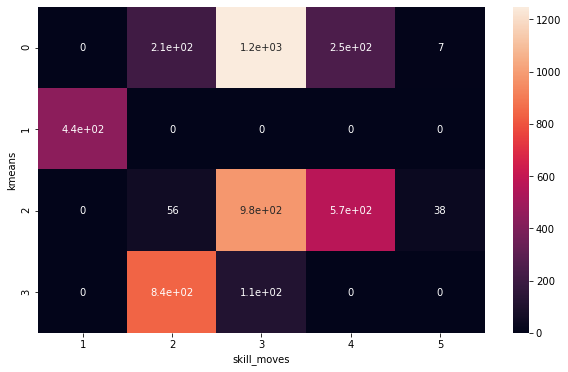

In [96]:

plt.figure(figsize=(10,6))
sns.heatmap(contingencia2, annot=True)

El cluster 0 tiene más habilidades 3, el cluster 1 tiene más habilidades de tipo 1, el cluster 2 tiene más habilidades de tipo 3 y el cluster 3 tiene más habilidades de tipo 2.. La mayor cantidad de jugadores con habilidades tipo 5 están en el cluster 2.

In [111]:
#Veamos las relaciones entre los skill_moves y la posicion del jugador en el cluster 1
plt.figure(figsize=(10,6))
contingencia_c1 = pd.crosstab(df_clusters[df_clusters.kmeans==1].skill_moves, df_clusters[df_clusters.kmeans==1].team_position)
contingencia_c1

team_position   GK  RES  SUB
skill_moves                 
1              279   18  131

<Figure size 720x432 with 0 Axes>

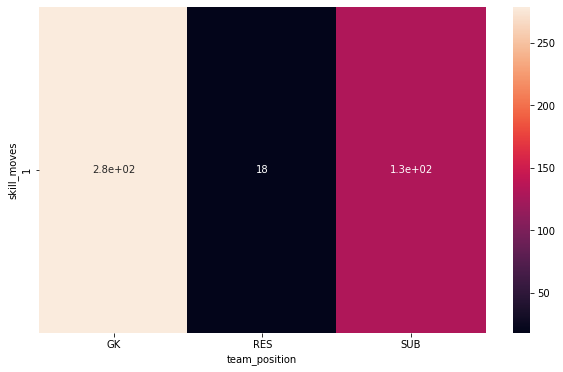

In [112]:
plt.figure(figsize=(10,6))
sns.heatmap(contingencia_c1, annot=True)

Podemos ver que el cluster 1 tiene tres posiciones. GK, RES, y SUB, sin embargo estas dos ultimas no representan una posición específica en la cancha

# 4.-Clustering-Mean-Shift 

- NO es necesario definirle la cantidad de grupos/clusters
- NO es escalable, computacionalmente es muy pesado. Cada dato tienen un proceso iterativo en donde en cada iteración considera los vecinos a menos de un radio de distancia.
- Hipeparámetros: radio (de cobertura para cálculo de media)

In [141]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

ms = MeanShift(bandwidth=72)

ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)

# Etiquetas de los elementos de los clusters


Numero estimado de clusters para Mean Shift : 5


In [142]:
df_skills.columns

Index(['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes'],
      dtype='object')

In [122]:
#Usamos las variables encontradas en el prácitco 1

In [143]:
skills_ratings.index('movement_balance')

14

In [144]:
skills_ratings.index('mentality_interceptions')

21

In [145]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[14]
skill_2=skills_ratings[21]


MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [146]:
df_clusters['MeanShift'] = ms.labels_ #clusters2
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms.labels_)+1, 'clusters, según los hiperparámetros elegidos')

Kmeans encontró:  4 clusters, nosotros lo forzamos
Mean shift encontró  5 clusters, según los hiperparámetros elegidos


**EVALUACIÓN**

**EJERCICIO EN GRUPO: Análisis exploratorio de los clusters, usando las clases asignadas por MeanShift** 

1. Cantidad de observaciones por Cluster
2. Análisis descriptivo separando por Cluster
3. Tabla de contingencia alguna categórica vs clusters


In [147]:
df_clusters.groupby(by=['MeanShift']).size()


MeanShift
0    4288
1     440
2       1
3       2
4      25
dtype: int64

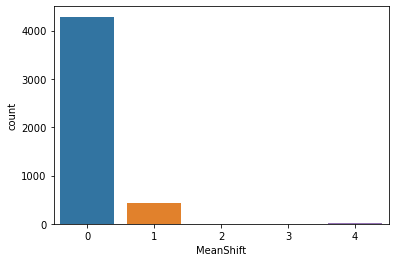

In [149]:
sns.countplot(data=df_clusters, x=df_clusters.MeanShift)

In [150]:
df_clusters.groupby(by='MeanShift').describe(include='object')

player_url         \
               count unique   
MeanShift                     
0               4288   4288   
1                440    440   
2                  1      1   
3                  2      2   
4                 25     25   

                                                                  short_name  \
                                                         top freq      count   
MeanShift                                                                      
0          https://sofifa.com/player/189595/mehmet-ekici/...    1       4288   
1          https://sofifa.com/player/153275/jean-louis-le...    1        440   
2          https://sofifa.com/player/245297/giovanni-luis...    1          1   
3          https://sofifa.com/player/245299/jaime-nicolas...    1          2   
4          https://sofifa.com/player/204639/stefan-savic/...    1         25   

                                    long_name         \
          unique           top freq     count unique   
MeanShift                                              
0           4182  J. Rodríguez    5      4288   4286   
1            439        Rafael    2       440    440   
2              1   G. Quintana    1         1      1   
3              2   J. Frendado    1         2      2   
4             25       M. Bani    1        25     25   

                                             dob                          \
                                  top freq count unique         top freq   
MeanShift                                                                  
0                          Ben Davies    2  4288   2842  1988-02-29   58   
1                       Jesse Joronen    1   440    403  1984-02-29    7   
2              Giovanni Luis Quintana    1     1      1  1984-02-29    1   
3                       Phil Jagielka    1     2      2  1982-08-17    1   
4          Wallace Fortuna dos Santos    1    25     24  1991-01-08    2   

          nationality                       club                           \
                count unique      top freq count unique               top   
MeanShift                                                                   
0                4288    114   Brazil  406  4288    494           Chelsea   
1                 440     66    Spain   44   440    304          Juventus   
2                   1      1  Uruguay    1     1      1           Uruguay   
3                   2      2  England    1     2      2  Sheffield United   
4                  25     17    Italy    5    25     23       Dynamo Kyiv   

               player_positions                     preferred_foot         \
          freq            count unique     top freq          count unique   
MeanShift                                                                   
0           28             4288    393      CB  639           4288      2   
1            4              440      1      GK  440            440      2   
2            1                1      1  RB, RM    1              1      1   
3            1                2      2      CB    1              2      1   
4            2               25      3      CB   23             25      2   

                       work_rate                             body_type         \
             top  freq     count unique            top  freq     count unique   
MeanShift                                                                       
0          Right  3184      4288      8  Medium/Medium  1424      4288      8   
1          Right   380       440      1  Medium/Medium   440       440      4   
2          Right     1         1      1    High/Medium     1         1      1   
3          Right     2         2      2    Medium/High     1         2      1   
4          Right    24        25      6    Medium/High    10        25      3   

                        real_face                   player_tags         \
              top  freq     count unique  top  freq       count unique   
MeanShift                      

In [151]:
df_clusters.groupby(by='MeanShift').describe()[skills_ratings]

attacking_crossing                                                  \
                       count       mean        std   min    25%   50%    75%   
MeanShift                                                                      
0                     4288.0  62.871502  13.455732  11.0  56.00  66.0  72.00   
1                      440.0  14.945455   4.477402   6.0  12.00  14.0  18.00   
2                        1.0  79.000000        NaN  79.0  79.00  79.0  79.00   
3                        2.0  46.500000   9.192388  40.0  43.25  46.5  49.75   
4                       25.0  28.640000   7.325071  14.0  27.00  29.0  32.00   

                attacking_finishing                                          \
            max               count       mean        std   min   25%   50%   
MeanShift                                                                     
0          93.0              4288.0  58.433769  16.337837  14.0  47.0  63.0   
1          35.0               440.0  13.175000   3.302351   5.0  11.0  13.0   
2          79.0                 1.0  48.000000        NaN  48.0  48.0  48.0   
3          53.0                 2.0  43.000000  18.384776  30.0  36.5  43.0   
4          44.0                25.0  22.240000   6.326400  13.0  18.0  21.0   

                      attacking_heading_accuracy                              \
            75%   max                      count       mean        std   min   
MeanShift                                                                      
0          71.0  95.0                     4288.0  63.907416  11.897296  20.0   
1          15.0  27.0                      440.0  14.909091   4.320941   7.0   
2          48.0  48.0                        1.0  69.000000        NaN  69.0   
3          49.5  56.0                        2.0  78.500000   2.121320  77.0   
4          23.0  38.0                       25.0  75.160000   6.053098  58.0   

                                    attacking_short_passing             \
             25%   50%    75%   max                   count       mean   
MeanShift                                                                
0          56.00  66.0  73.00  93.0                  4288.0  71.562500   
1          12.00  14.0  17.00  47.0                   440.0  30.352273   
2          69.00  69.0  69.00  69.0                     1.0  71.000000   
3          77.75  78.5  79.25  80.0                     2.0  68.500000   
4          73.00  75.0  78.00  85.0                    25.0  60.840000   

                                                    attacking_volleys  \
                std   min    25%   50%    75%   max             count   
MeanShift                                                               
0          6.546299  44.0  67.75  72.0  76.00  92.0            4288.0   
1          8.677780  11.0  25.00  30.0  35.00  61.0             440.0   
2               NaN  71.0  71.00  71.0  71.00  71.0               1.0   
3          2.121320  67.0  67.75  68.5  69.25  70.0               2.0   
4          8.008745  48.0  56.00  60.0  65.00  77.0              25.0   

                                                                 \
                mean        std   min    25%   50%    75%   max   
MeanShift                                                         
0          55.891325  15.612354  11.0  45.00  59.0  68.00  90.0   
1          13.706818   3.371183   5.0  11.00  13.0  16.00  26.0   
2          49.000000        NaN  49.0  49.00  49.0  49.00  49.0   
3          53.500000  13.435029  44.0  48.75  53.5  58.25  63.0   
4          23.120000   8.017273  14.0  16.00  21.0  27.00  44.0   

          skill_dribbling                                                  \
                    count       mean        std   min    25%   50%    75%   
MeanShift                                                                   
0                  4288.0  69.471549  10.803918  22.0  65.00  72.0  76.00   
1                   440.0  15.400000   4.273028   7.0  12.00  15.0  18.0

Podemos ver que la agrupación de los datos se encuentra muy desbalanceada, y esto se puede deber quizá a que tal vez se necesiten estandarizar los datos.

In [152]:
from sklearn import preprocessing

In [267]:
X=df_clusters[skills_ratings]
escalar=preprocessing.StandardScaler().fit(X)
X_scaled=escalar.transform(X) # numpyarray normalizado por columna

In [268]:
X_scaled

array([[ 1.56157966,  2.00027389,  0.57915163, ..., -0.06990257,
        -0.13580577, -0.4462927 ],
       [ 1.35158969,  1.95142986,  1.62125554, ..., -0.06990257,
        -0.13580577, -0.29333687],
       [ 1.50908217,  1.60952166,  0.14037104, ..., -0.06990257,
        -0.08259774, -0.29333687],
       ...,
       [ 0.61662478, -0.05117531,  0.08552347, ..., -0.2397833 ,
        -0.18901379, -0.4462927 ],
       [-0.01334514, -0.00233129,  0.46945648, ..., -0.40966404,
        -0.29542984, -0.49727797],
       [-0.53832007, -0.58845963,  0.30491376, ..., -0.35303713,
        -0.13580577, -0.49727797]])

In [269]:
#MeanShift con las variables escaladas

ms = MeanShift(bandwidth=3, bin_seeding=True)

ms.fit(X_scaled)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)

# Etiquetas de los elementos de los clusters

Numero estimado de clusters para Mean Shift : 2


In [270]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[14]
skill_2=skills_ratings[21]


MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [271]:
df_clusters['MeanShift'] = ms.labels_ #clusters2

In [272]:
df_clusters.groupby(by='MeanShift').size()

MeanShift
0    2622
1    2134
dtype: int64

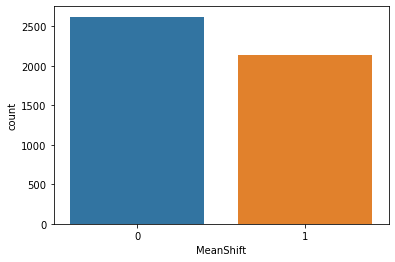

In [273]:
sns.countplot(data=df_clusters, x=df_clusters.MeanShift)

In [274]:
skills_visibles=[skills_ratings[14],skills_ratings[21]]

In [275]:
df_clusters.groupby(by='MeanShift').describe()[skills_visibles].T

MeanShift                                0            1
movement_balance        count  2622.000000  2134.000000
                        mean     64.842487    66.484536
                        std      13.012247    16.154072
                        min      26.000000    20.000000
                        25%      57.000000    56.000000
                        50%      66.000000    70.000000
                        75%      74.000000    78.000000
                        max      94.000000    96.000000
mentality_interceptions count  2622.000000  2134.000000
                        mean     72.000000    32.148547
                        std       6.355187    12.420019
                        min      32.000000     7.000000
                        25%      69.000000    22.000000
                        50%      72.000000    30.000000
                        75%      76.000000    41.000000
                        max      92.000000    69.000000

In [276]:
#tabla de contigencia
plt.figure(figsize=(10,6))
cont_meanshift = pd.crosstab(df_clusters.MeanShift, df_clusters.team_position)
cont_meanshift

team_position  CAM  CB  CDM  CF  CM   GK  LAM   LB  LCB  LCM  LDM  LF   LM  \
MeanShift                                                                    
0               46  40   81   2  27    0    1  164  256  116   96   3   29   
1              102   0    1   7   3  279   12    0    0   38    3   8  136   

team_position  LS  LW  LWB  RAM   RB  RCB  RCM  RDM  RES  RF   RM  RS  RW  \
MeanShift                                                                   
0               1   3   12    2  176  262  139   95  134   2   41   3   7   
1              83  68    2   11    0    0   19    1  112   5  111  85  62   

team_position  RWB   ST  SUB  
MeanShift                     
0               16    6  813  
1                1  210  727

<Figure size 720x432 with 0 Axes>

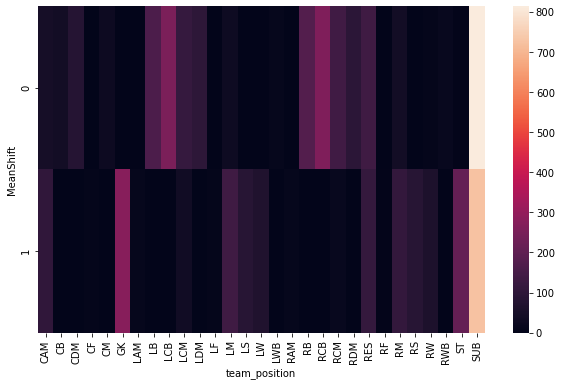

In [277]:
plt.figure(figsize=(10,6))
sns.heatmap(data=cont_meanshift )

Los jugadores SUB siguen predominando en todos los clusters. En el 1 predominan GK y en el 0 LCB y RCB.

In [278]:
plt.figure(figsize=(10,6))
cont_meanshift_skills = pd.crosstab(df_clusters.MeanShift, df_clusters.skill_moves)
cont_meanshift_skills

skill_moves    1     2     3    4   5
MeanShift                            
0              0  1058  1334  225   5
1            440    51  1012  591  40

<Figure size 720x432 with 0 Axes>

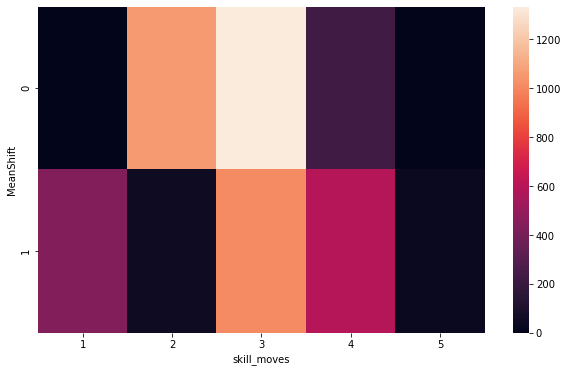

In [279]:
plt.figure(figsize=(10,6))
sns.heatmap(data=cont_meanshift_skills )

Habilidades 2 y 3 en el cluster 0, y habilidades de tipo 3 y 4 en el cluster 1

<Figure size 720x432 with 0 Axes>

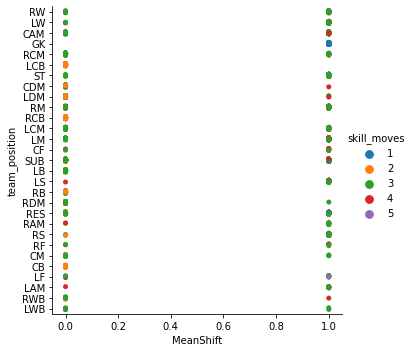

In [280]:
#Veamos cómo son las distribuciones de los jugadores en los equipos y en los skill moves por cluster..
plt.figure(figsize=(10,6))
sns.catplot(data=df_clusters, x='MeanShift', y='team_position', hue='skill_moves')

**Pregunta: normalizamos/estandarizamos la base?**

Sí, ya la hemos normalizado

**Ahora vemos que agrupamientos podemos hacer excluyendo los arqueros**

# 5.-Clustering-con-Kmeans-sin-arqueros

In [281]:
n=10000

df_n=df.loc[:n]
df_n=df_n[(df_n["team_position"]!='GK')&(df_n['overall']>69)]

skills_ratings = ['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle']

df_skills=df_n[skills_ratings]


In [282]:
df_skills.columns

Index(['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle'],
      dtype='object')

Estandarizamos los valores..

In [283]:
X=df_skills
escalar_2=preprocessing.StandardScaler().fit(X)
X_scaled=escalar_2.transform(X) 

In [284]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(X_scaled)

# Recuperacion de etiquetas
clusters = km.labels_


In [285]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[15]
skill_2=skills_ratings[28]


kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=4,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

# 6.-Clustering-Mean-Shift-sin-arqueros 

In [286]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition


ms = MeanShift(bandwidth=2, bin_seeding=True)

ms.fit(X_scaled)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero de clusters encontrado por Mean Shift : %d" % n_clusters_)


Numero de clusters encontrado por Mean Shift : 4


In [287]:
df_skills.columns

Index(['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle'],
      dtype='object')

In [309]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Elijo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[14]
skill_2=skills_ratings[21]


MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [292]:
df_clusters=df_skills
df_clusters['MeanShift'] = ms.labels_ #clusters2

In [293]:
df_clusters.groupby(by='MeanShift').size()

MeanShift
0    2266
1     331
2     964
3    1776
dtype: int64

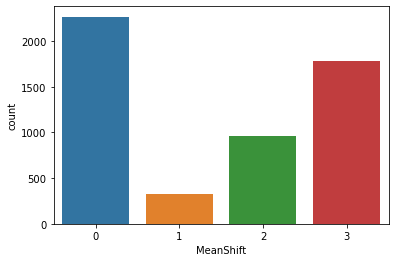

In [294]:
sns.countplot(data=df_clusters, x=df_clusters.MeanShift)

Nos fijamos si podemos mejorar esta visualizacion buscando las variables donde mejor se vea la separacion. Buscamos los centroides

In [295]:
centroide_meanshift=pd.DataFrame(data=cluster_centers, columns=skills_ratings)
centroide_meanshift

attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0            0.381865             0.336245                    0.053048   
1            0.604462             0.400366                   -0.173355   
2            0.481158             0.784516                    0.568311   
3            0.357853             0.400366                    0.500887   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                 0.412818           0.468785         0.265739     0.479043   
1                 0.274300           0.506572         0.436976     0.306818   
2                -0.494121           0.564472         0.169199     0.248384   
3                -0.109911          -0.072426         0.370032     0.423685   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0           0.635177            0.645815            0.262875   
1           0.303583            0.645815            0.283830   
2           0.361172            0.069840            0.034985   
3          -0.387490            0.316687            0.200882   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0              -0.017479              -0.036235          0.168665   
1               0.468794               0.020918         -0.052292   
2              -0.037265               0.020918          0.470613   
3               0.251912               0.392809          0.321212   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0           -0.111587          0.251723          0.478153       0.198457   
1           -1.743979          0.099506         -0.176688      -0.384232   
2           -0.165138         -0.189705         -0.088070       1.859907   
3           -0.866845          0.533323          0.089166       0.446931   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0       0.622025        0.203349          0.595678              0.457174   
1       0.167191        0.005217          0.245472              0.765200   
2       0.247060        0.178697          0.245472              0.565229   
3      -0.072416        0.352177          0.245472             -0.434625   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                 0.598982               0.319643          0.510650   
1                -0.320340               0.124207          0.626453   
2                -1.574884               0.582638          0.236336   
3                -0.030830               0.296118         -0.075757   

   mentality_penalties  mentality_composure  defending_marking  \
0             0.250630             0.143562           0.516142   
1             0.016611            -0.153755          -1.778730   
2             0.222461             0.092928          -1.678494   
3             0.016611            -0.153755           0.075632   

   defending_standing_tackle  defending_sliding_tackle  
0                   0.601399                  0.582929  
1                  -0.175795                  0.186752  
2                  -1.650621                 -1.445687  
3                   0.008558                 -0.130667

In [296]:
correlaciones1=centroide_kmean.corr()

In [297]:
minimo_corr_meanshift=[]
for i in correlaciones1.columns:
    minimo_corr_meanshift.append(correlaciones1[i].abs().min())

In [298]:
minimo1={'minimo':minimo_corr_meanshift}
pa=pd.DataFrame(data=minimo1)
pa

minimo
0   0.066859
1   0.033946
2   0.023398
3   0.132079
4   0.031533
5   0.006950
6   0.031307
7   0.026391
8   0.040166
9   0.103597
10  0.066138
11  0.052125
12  0.158526
13  0.023398
14  0.227311
15  0.001209
16  0.026391
17  0.228098
18  0.004550
19  0.058461
20  0.050446
21  0.021583
22  0.004550
23  0.104413
24  0.041949
25  0.127002
26  0.042679
27  0.037698
28  0.001209
29  0.191876
30  0.193820
31  0.190485
32  0.192702
33  0.192046

In [302]:
corr_min_shift=pa['minimo'].abs().sort_values(ascending=True)
corr_min_shift[1:3]

15    0.001209
22    0.004550
Name: minimo, dtype: float64

In [303]:
correlaciones1.columns[15]

'power_shot_power'

In [304]:
correlaciones1[correlaciones1.columns[15]].abs().idxmin()

'defending_sliding_tackle'

In [80]:
skills_ratings.index('defending_sliding_tackle')

28

In [305]:
skills_ratings.index('power_shot_power')

15

In [320]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Elijo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[28]
skill_2=skills_ratings[15]


MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [310]:
df_clusters=df_skills
df_clusters['kmeans'] = km.labels_ #clusters
df_clusters['MeanShift'] = ms.labels_ #clusters2

**Análisis exploratorio de las clases**

# Kmeans

In [311]:
df_clusters.groupby(by=['kmeans']).size()

kmeans
0    1980
1    1090
2    2067
3     200
dtype: int64

In [312]:
columnas_principales=[df_clusters.columns[15],df_clusters.columns[28] ]

In [313]:
df_clusters.groupby(by=['kmeans'])[columnas_principales].describe()

power_shot_power                                                       \
                  count       mean        std   min    25%   50%   75%   max   
kmeans                                                                         
0                1980.0  73.454545   6.618642  39.0  70.00  74.0  78.0  95.0   
1                1090.0  56.003670  11.971192  15.0  48.00  56.0  65.0  89.0   
2                2067.0  70.658442   8.483709  32.0  66.00  72.0  76.0  95.0   
3                 200.0  51.740000   4.954304  32.0  48.75  52.0  55.0  68.0   

       defending_sliding_tackle                                                \
                          count       mean        std   min   25%   50%   75%   
kmeans                                                                          
0                        1980.0  30.197980  10.813462  10.0  22.0  29.0  38.0   
1                        1090.0  71.882569   5.031304  18.0  69.0  71.0  75.0   
2                        2067.0  68.304306   8.098426  36.0  64.0  69.0  74.0   
3                         200.0  14.500000   3.511646   8.0  12.0  14.0  17.0   

              
         max  
kmeans        
0       62.0  
1       89.0  
2       90.0  
3       25.0

In [314]:
df_clusters.groupby(by=['kmeans']).count()#['attacking_crossing']

attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
kmeans                                                                        
0                     1980                 1980                        1980   
1                     1090                 1090                        1090   
2                     2067                 2067                        2067   
3                      200                  200                         200   

        attacking_short_passing  attacking_volleys  skill_dribbling  \
kmeans                                                                
0                          1980               1980             1980   
1                          1090               1090             1090   
2                          2067               2067             2067   
3                           200                200              200   

        skill_curve  skill_fk_accuracy  skill_long_passing  \
kmeans                                                       
0              1980               1980                1980   
1              1090               1090                1090   
2              2067               2067                2067   
3               200                200                 200   

        skill_ball_control  movement_acceleration  movement_sprint_speed  \
kmeans                                                                     
0                     1980                   1980                   1980   
1                     1090                   1090                   1090   
2                     2067                   2067                   2067   
3                      200                    200                    200   

        movement_agility  movement_reactions  movement_balance  \
kmeans                                                           
0                   1980                1980              1980   
1                   1090                1090              1090   
2                   2067                2067              2067   
3                    200                 200               200   

        power_shot_power  power_jumping  power_stamina  power_strength  \
kmeans                                                                   
0                   1980           1980           1980            1980   
1                   1090           1090           1090            1090   
2                   2067           2067           2067            2067   
3                    200            200            200             200   

        power_long_shots  mentality_aggression  mentality_interceptions  \
kmeans                                                                    
0                   1980                  1980                     1980   
1                   1090                  1090                     1090   
2                   2067                  2067                     2067   
3                    200                   200                      200   

        mentality_positioning  mentality_vision  mentality_penalties  \
kmeans                                                                 
0                        1980              1980                 1980   
1                        1090              1090                 1090   
2                        2067              2067                 2067   
3                         200               200                  200   

        mentality_composure  defending_marking  defending_standing_tackle  \
kmeans                                                                      
0                      1980               1980                       1980   
1                      1090               1090                       1090   
2                      2067               2067                       2067   
3                       200                200                        200   

        defending_sliding_tackle  MeanShift  
kmeans                                   

In [315]:
df_clusters.groupby(by=['kmeans']).count()[columnas_principales]

power_shot_power  defending_sliding_tackle
kmeans                                            
0                   1980                      1980
1                   1090                      1090
2                   2067                      2067
3                    200                       200

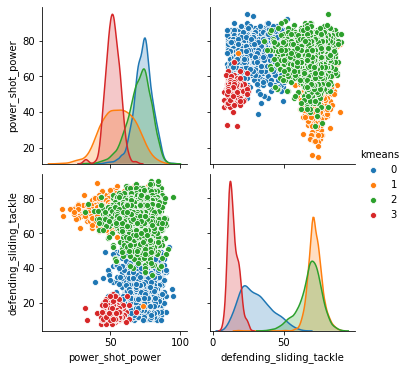

In [316]:
sns.pairplot(data=df_clusters, vars=columnas_principales, hue='kmeans')

# Mean shift

In [317]:
df_clusters.groupby(by=['MeanShift']).size()

MeanShift
0    2266
1     331
2     964
3    1776
dtype: int64

In [318]:
df_clusters.groupby(by=['MeanShift']).count()[columnas_principales]

power_shot_power  defending_sliding_tackle
MeanShift                                            
0                      2266                      2266
1                       331                       331
2                       964                       964
3                      1776                      1776

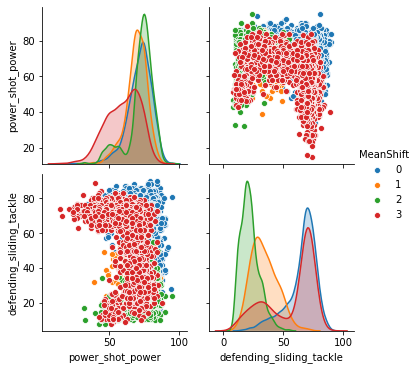

In [319]:
sns.pairplot(data=df_clusters, vars=columnas_principales, hue='MeanShift')